In [264]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import mse,rmse
df = pd.read_csv('artificial_1.csv' ,parse_dates=["date"])
from statsmodels.tsa.statespace.sarimax import SARIMAX

#df.to_string()
print(df.head())


        date      value  temperature
0 2018-01-01  72.624345          6.0
1 2018-01-02  65.388244         10.0
2 2018-01-03  65.471828         11.0
3 2018-01-04  64.927031          8.0
4 2018-01-05  66.865408         10.0


In [265]:
def evaluatereg(actual,prediction):
    
    return  ('MSE = ', mse(actual, prediction), 'RMSE = ', rmse(actual, prediction),'R2 score =', r2_score(actual,prediction), 'MAPE =',np.mean(np.abs((prediction - actual) /np.abs(actual))) * 100) 

In [266]:
df_train = df.iloc[:-60]
df_test = df.iloc[-60:]

In [267]:
#LAGGED 3 TIMES
from pandas import concat
temps = DataFrame(df_train.value)
len(temps)

670

In [268]:
width = 3
window4 = temps.expanding()
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max()], axis=1)
dataframe.columns = [ 'min_value', 'mean_value', 'max_value']
print(dataframe)

     min_value  mean_value  max_value
0          NaN         NaN        NaN
1          NaN         NaN        NaN
2          NaN         NaN        NaN
3          NaN         NaN        NaN
4    65.388244   67.828139  72.624345
..         ...         ...        ...
665  53.209004   57.924332  65.020110
666  55.543882   62.418856  66.692574
667  29.521328   53.744671  66.692574
668  29.521328   43.628283  66.692574
669  29.521328   33.513127  36.347105

[670 rows x 3 columns]


In [327]:
from pandas import concat
temps = DataFrame(df.value)
len(temps)
width = 3
windowex = temps.shift(2).expanding()
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max()], axis=1)
dataframe.columns = [ 'min_value', 'mean_value', 'max_value']
temps = DataFrame(df.value)


dates = pd.to_datetime(df.date)
test_df = df.copy()
test_df["year"] = dates.dt.year
test_df["month"] = dates.dt.month
test_df["day"] = dates.dt.day


dataframe3= pd.concat([test_df["year"], test_df["month"],test_df["day"], dataframe.min_value, dataframe.mean_value, dataframe.max_value, windowex.min(), windowex.mean(), windowex.max(), temps.shift(1), temps.shift(2), temps.shift(3),temps.shift(7),temps.shift(8)],axis=1)

dataframe3.columns = [ 'year', 'month', 'day','min_rolling','mean_rolling',  'max_rolling','min_expanding', 'mean_expanding', 'max_expanding','t-1','t-2','t-3','t-7','t-8']

dataframeee=[df,dataframe3]

dataframe2= pd.concat(dataframeee, "columns").dropna()


#seasons
seasonsdataframe=DataFrame()
l=[]
for i in test_df.month.values:
    if i== 6 or 7 or 8:
        l.append('2')
    if i == 3 or 4 or 5:
        l.append('1')
    if i== 9 or 10 or 11:
        l.append('3')
    if i== 12 or 1 or 2:
        l.append('4')
seasonsdataframe = pd.DataFrame(l)
seasonsdataframe.columns= ['seasons']
dataframe2["seasons"]=seasonsdataframe.seasons
dataframe2['sin_month'] = np.sin((dataframe2.month-1)*(2.*np.pi/12))
dataframe2['cos_month'] = np.cos((dataframe2.month-1)*(2.*np.pi/12))

dataf = df.value.copy()
shifted6 = dataf.shift(6)
window7 = shifted6.rolling(7).mean()
shifted7 = dataf.shift(7)
window8= shifted7.rolling(8).mean()
shifted4 = dataf.shift(4)
window5 = shifted4.rolling(5).mean()
shifted3 = dataf.shift(3)
window4= shifted3.rolling(4).mean()
shifted1 = dataf.shift(1)
window2= shifted1.rolling(2).mean()
window7.dropna()
window8.dropna()
window4.dropna()
window5.dropna()
window2.dropna()


dataframe2["rolling7"] = window7
dataframe2["rolling8"] =window8
dataframe2["rolling4"] =window4
dataframe2["rolling5"] =window5
dataframe2["rolling2"] =window2
dataframe2 = dataframe2.dropna()

In [328]:
dataframe2['sin_month'] = np.sin((dataframe2.month-1)*(2.*np.pi/12))
dataframe2['cos_month'] = np.cos((dataframe2.month-1)*(2.*np.pi/12))

In [329]:
dataframe2.head()

,date,value,temperature,year,month,day,min_rolling,mean_rolling,max_rolling,min_expanding,...,t-7,t-8,seasons,sin_month,cos_month,rolling7,rolling8,rolling4,rolling5,rolling2
14,2018-01-15,72.133769,2.0,2018,1,15,42.939859,44.693183,46.462108,39.238793,...,39.238793,67.744812,3,0.0,1.0,59.037910,63.244865,44.867909,48.703076,44.646764
15,2018-01-16,64.900109,2.0,2018,1,16,42.939859,44.077796,44.677583,39.238793,...,45.319039,39.238793,4,0.0,1.0,56.077739,59.831702,44.707545,43.742086,58.374858
16,2018-01-17,65.827572,7.0,2018,1,17,44.615946,53.809099,72.133769,39.238793,...,44.750630,45.319039,2,0.0,1.0,53.439893,57.252000,44.673874,44.829844,68.516939
17,2018-01-18,65.122142,8.0,2018,1,18,44.615946,60.549941,72.133769,39.238793,...,46.462108,44.750630,1,0.0,1.0,50.021957,54.875785,51.091789,44.689225,65.363840
18,2018-01-19,66.042214,4.0,2018,1,19,64.900109,67.620483,72.133769,39.238793,...,42.939859,46.462108,3,0.0,1.0,47.304689,52.127389,56.581852,50.165853,65.474857


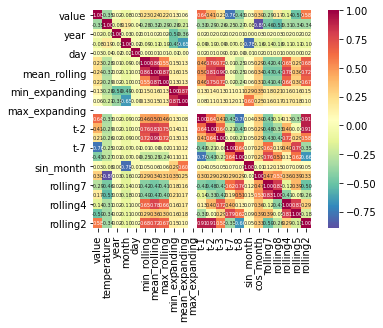

In [272]:
corrmat = dataframe2.corr()
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":5},cmap ="Spectral_r")
plt.show()

# SARIMAX with Features

In [331]:
copyset2 = dataframe2.drop(columns = "date").astype(float).copy()
trainset = copyset2.iloc[:-60]
testset = copyset2.iloc[-60:]
x_train=trainset.drop(columns="value")
y_train=trainset["value"]
x_test=testset.drop(columns="value")
y_test=testset["value"]
x_train.shape[0]

656

In [256]:
from pmdarima.arima import auto_arima



model_autoarima = auto_arima(trainset["value"],exog=x_train,
                              start_p=0, start_q=0,start_Q=0,max_P=5,max_Q=5,
                              test='kpss',
                              max_p=5, max_q=5, m=7,
                              start_P=0, seasonal=True,
                              d=None, D=None,
                              trace=False,
                              error_action='ignore',  
                              suppress_warnings=True,
                              stepwise=True)
#m = 7 as data contains daily observations

In [257]:
model_autoarima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  656
Model:             SARIMAX(3, 0, 0)x(2, 0, [1], 7)   Log Likelihood               -1646.872
Date:                             Mon, 22 Aug 2022   AIC                           3309.744
Time:                                     10:49:42   BIC                           3345.634
Sample:                                          0   HQIC                          3323.659
                                             - 656                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3796      2.990      5.144      0.000       9.520      21.240
ar.L1          0.5636      0.031     18.139      0.000       0.503       0.624
ar.L2          0.1180      0.033      3.551      0.000       0.053       0.183
ar.L3          0.1671      0.028      5.990      0.000       0.112       0.222
ar.S.L7       -1.0211      0.036    -27.994      0.000      -1.093      -0.950
ar.S.L14      -0.0221      0.036     -0.611      0.541      -0.093       0.049
ma.S.L7        0.9180      0.024     37.689      0.000       0.870       0.966
sigma2         7.8356      0.333     23.503      0.000       7.182       8.489
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               318.93
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.03
Prob(H) (two-sided):                  0.95   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [258]:
lastmodel = SARIMAX(y_train,exog=x_train.astype(float),order = (3,0,0),seasonal_order=(2,0,1,7),enforce_invertibility=False)
results = lastmodel.fit()
results.summary()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               value   No. Observations:                  656
Model:             SARIMAX(3, 0, 0)x(2, 0, [1], 7)   Log Likelihood               -1652.550
Date:                             Mon, 22 Aug 2022   AIC                           3365.100
Time:                                     10:51:15   BIC                           3499.685
Sample:                                          0   HQIC                          3417.280
                                             - 656                                         
Covariance Type:                               opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
temperature       -0.2698      0.038     -7.119      0.000      -0.344      -0.196
year               0.0627      0.553      0.113      0.910      -1.021       1.146
month              0.0320      0.162      0.197      0.844      -0.286       0.350
day                0.0059      0.017      0.357      0.721      -0.026       0.038
min_rolling       -0.0511      0.094     -0.541      0.588      -0.236       0.134
mean_rolling       0.0241      0.248      0.097      0.923      -0.462       0.510
max_rolling       -0.0759      0.094     -0.804      0.421      -0.261       0.109
min_expanding      0.3011      0.182      1.653      0.098      -0.056       0.658
mean_expanding    -0.3750      0.232     -1.616      0.106      -0.830       0.080
max_expanding     -1.1515     15.402     -0.075      0.940     -31.339      29.035
t-1                0.2401      0.107      2.247      0.025       0.031       0.450
t-2                0.0350      0.041      0.854      0.393      -0.045       0.115
t-3               -0.0145      0.063     -0.229      0.819      -0.139       0.110
t-7               -0.9592      0.018    -54.479      0.000      -0.994      -0.925
t-8                0.2224      0.141      1.582      0.114      -0.053       0.498
seasons            0.1575      0.133      1.184      0.236      -0.103       0.418
sin_month          0.3756      0.664      0.566      0.572      -0.926       1.677
cos_month          0.0530      0.787      0.067      0.946      -1.490       1.596
rolling7          -0.2368      0.067     -3.538      0.000      -0.368      -0.106
rolling8           0.7186      0.143      5.033      0.000       0.439       0.999
rolling4           0.3020      0.061      4.922      0.000       0.182       0.422
rolling5           0.0972      0.026      3.701      0.000       0.046       0.149
rolling2           0.1376      0.037      3.724      0.000       0.065       0.210
ar.L1              0.0084      0.138      0.060      0.952      -0.263       0.279
ar.L2              0.0312      0.053      0.589      0.556      -0.073       0.135
ar.L3             -0.0007      0.043     -0.016      0.988      -0.086       0.085
ar.S.L7            0.3495      0.286      1.224      0.221      -0.210       0.909
ar.S.L14          -0.1527      0.098     -1.553      0.121      -0.346       0.040
ma.S.L7            0.0268      0.291      0.092      0.927      -0.544       0.598
sigma2            10.2586      0.680     15.076      0.000       8.925      11.592
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                44.06
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.18
Prob(H) (two-sided):                  0.21   Kurt

In [339]:
start=len(trainset)
end=len(trainset)+len(testset)-1
predictions = results.predict(start=start, end=end,exog=x_test.astype(float), dynamic=False).rename('Predicted')


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Energy Values')]

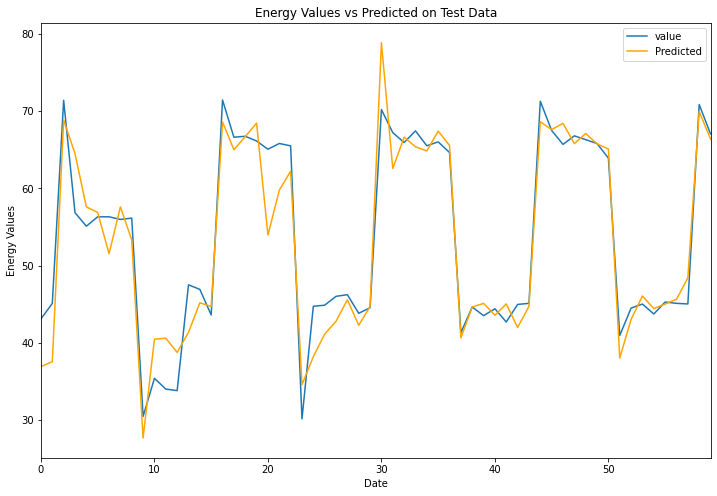

In [346]:
# Plot predictions against known values
title='Energy Values vs Predicted on Test Data'
ylabel='Energy Values'
xlabel='Date'

ax = plot_y_test['value'].plot(legend=True,figsize=(12,8),title=title)
#plot_pred = predictions.reset_index()
plot_pred["Predicted"].plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
#for x in testset.query('temperature==1').index: 
 #   ax.axvline(x=x, color='red', alpha = 0.5);

In [347]:
print(evaluatereg(testset.value,predictions))

('MSE = ', 13.110276393973098, 'RMSE = ', 3.620811565653907, 'R2 score =', 0.911198684801122, 'MAPE =', 6.3080289923666255)


In [275]:
lastlastmodel = SARIMAX(dataframe2.value, exog=dataframe2.drop(columns=["value","date"]).astype(float), order=(3,0,0),seasonal_order=(2,0,1,7),enforce_invertibility=False)
result2=lastlastmodel.filter(results.params)
pred = result2.predict()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


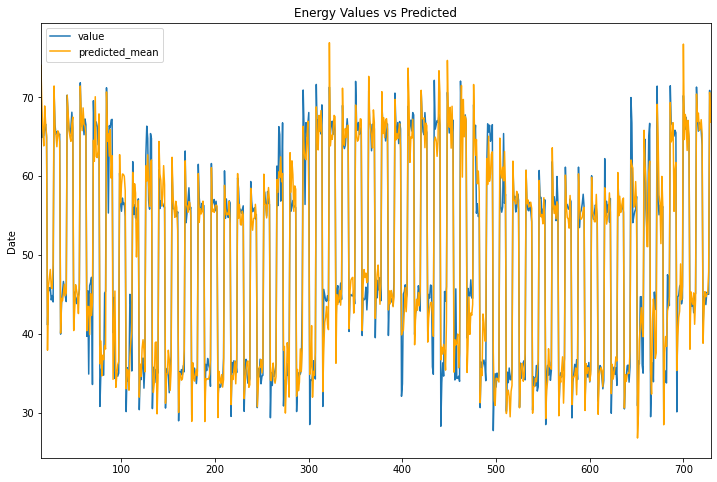

In [276]:
title='Energy Values vs Predicted'
ylabel='Date'
xlabel=''

ax = trainset["value"].append(testset["value"]).plot(legend=True,figsize=(12,8),title=title)
pred.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in testset.query('temperature==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

In [277]:
print(evaluatereg(testset.value,predictions))

('MSE = ', 13.110276393973098, 'RMSE = ', 3.620811565653907, 'R2 score =', 0.911198684801122, 'MAPE =', 6.3080289923666255)
